### Алгоритм PCA
1. Определить $k<n$ - новую размерность
2. Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$  на $$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
3. Привести данные к единичной дисперсии: посчитать $$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Найти сингулярное разложение матрицы $X$:
$$\Large X = UDV^T$$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

# Сингулярное разложение матрицы

Представление будет таким: $X = U\Sigma V^T$. 

- Матрица $U$ составлена из собственных векторов матрицы $XX^T$. Это левые сингулярные векторы матрицы $X$;
- Матрица $V$ составлена из собственных векторов матрицы $X^TX$. Это правые сингулярные векторы матрицы $X$;
- Матрица $\Sigma$ - диагональная (вне главной диагонали нули), и на диагонали стоят корни  из собственных значений матрицы $X^TX$ (или $XX^T$). Это сингулярные числа матрицы $X$.

Populating the interactive namespace from numpy and matplotlib


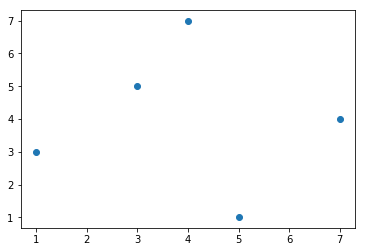

In [8]:
import numpy as np
%pylab inline
X = np.array([[1., 3.],
              [3., 5.],
              [5., 1.],
              [7., 4.],
              [4., 7.]])

scatter(X[:,0], X[:, 1]);

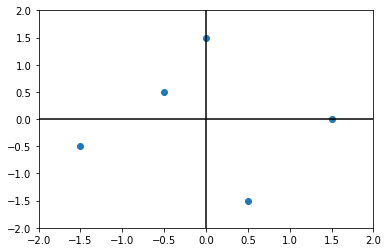

In [9]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
scatter(X_scaled[:, 0], X_scaled[:, 1])
plot([-2,2],[0,0], c='black')
plot([0,0],[-2,2], c='black')
xlim(-2,2)
ylim(-2,2);

**Назовем новые координаты (стоблцы матрицы X_scaled) $x_1$ и $x_2$. Задача: найти такую линейную комбинацию $z = \alpha x_1 + \beta x_2$, что дисперсия $z$ максимальна. При этом должно выполняться $\alpha^2 + \beta^2 = 1.$**
**Заметим что $$\Large D[z] = E[(z - E[z])^2]  = E[z^2] = \frac{1}{n} \sum_i^n z_i^2,$$ поскольку $E[z] = \alpha E[x_1] + \beta E[x_2] = 0$ (новые координаты центрированы).**

**Тогда задача формализуется так:**
$$\Large \begin{cases} \max_{\alpha, \beta} \sum_i^n (\alpha x_{1_i} + \beta x_{2_i})^2 \\  \alpha^2 + \beta^2 = 1\end{cases}$$


У нас $2z = [-3\alpha -\beta,\ -\alpha +\beta,\ \alpha -3\beta,\ 3\alpha,\ 3\beta]^T$ (Для задачи максимизации неважно, что мы умножили на 2, зато так удобней).


Распишем в нашем случае: $  \sum_i^n (\alpha x_{1_i} + \beta x_{2_i})^2 = (-3\alpha -\beta)^2 + ( -\alpha +\beta)^2 +( \alpha -3\beta)^2 +( 3\alpha)^2 +( 3\beta)^2 = 20\alpha^2 - 2\alpha\beta + 20\beta^2$ =  <font color='green'>\\ поскольку $\alpha^2 + \beta^2 = 1$ \\ </font>  = $20 - 2\alpha\beta$. Осталось только минимизировать $\alpha\beta$. Можно это делать методом Лагранжа, но в данному случае можно проще

$$\Large \begin{cases} \min_{\alpha, \beta} \alpha\beta \\  \alpha^2 + \beta^2 = 1\end{cases}$$

$\Large \alpha\beta = \beta^2(\frac{\alpha}{\beta})$ = <font color='green'>\\ замена t = $\frac{\alpha}{\beta}, \alpha^2 + \beta^2 = 1$ \\  </font> = $\Large \frac{t}{1+t^2}$. Ищем минимум функции одной переменной, находим, что $t^* = -1$.

Значит, $$\Large \begin{cases} \alpha^* = -\beta^*\\  (\alpha^*)^2 + (\beta^*)^2 = 1\end{cases} \Rightarrow \alpha^* = 
\frac{1}{\sqrt{2}}, \beta^* = - \frac{1}{\sqrt{2}}$$


Итак, $$\Large z = \frac{1}{\sqrt{2}} x_1 - \frac{1}{\sqrt{2}}x_2$$ То есть ось $z$ повернута на 45 градусов относительно $x_1$ и $x_2$ и "направлена на юго-восток".

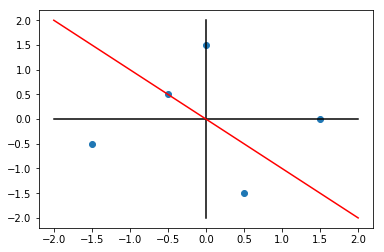

In [10]:
scatter(X_scaled[:, 0], X_scaled[:, 1])
plot([-2,2],[0,0], c='black')
plot([0,0],[-2,2], c='black')
plot([-2,2],[2,-2], c='red');

In [11]:
from sklearn.manifold import TSNE

In [13]:
tsne=TSNE(n_components=1)

In [20]:
X_tsne = tsne.fit_transform(X_scaled)

In [21]:
X_scaled

array([[-1.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -1.5],
       [ 1.5,  0. ],
       [ 0. ,  1.5]])

In [22]:
X_tsne

array([[-1231.2335 ],
       [  349.46088],
       [ -159.19174],
       [ -667.98395],
       [  911.9835 ]], dtype=float32)

Populating the interactive namespace from numpy and matplotlib


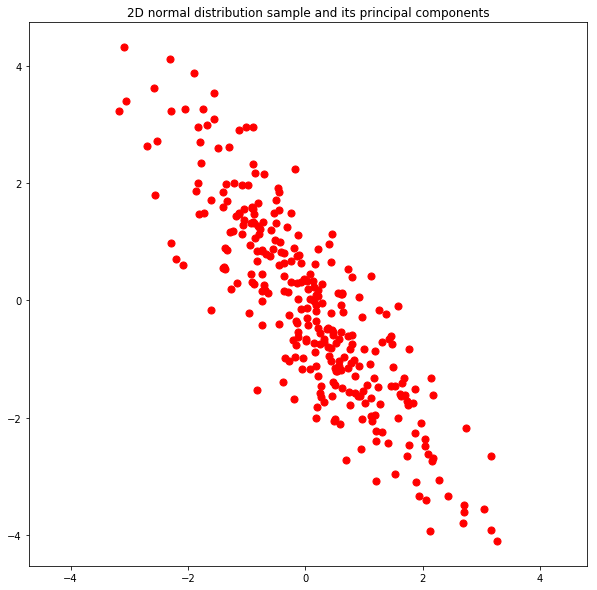

In [23]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

In [5]:
digits.data.shape

NameError: name 'digits' is not defined

Projecting 64-dimensional data to 2D


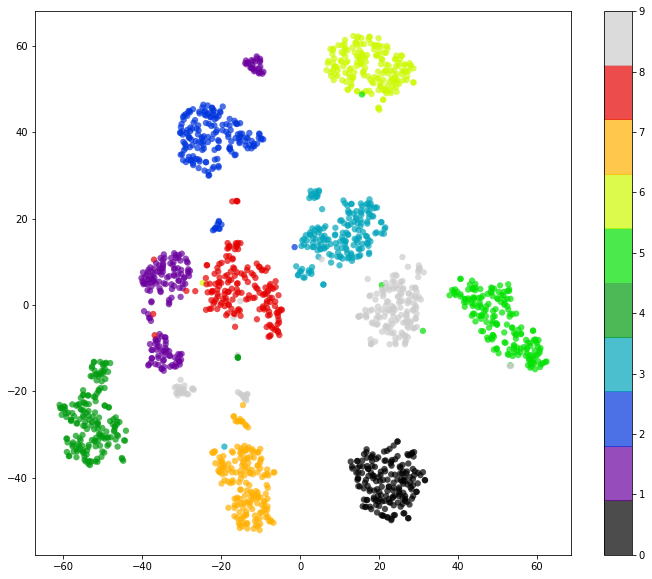

In [25]:
#Посмотрим на применение PCA
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = TSNE(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

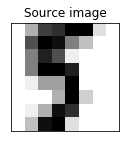

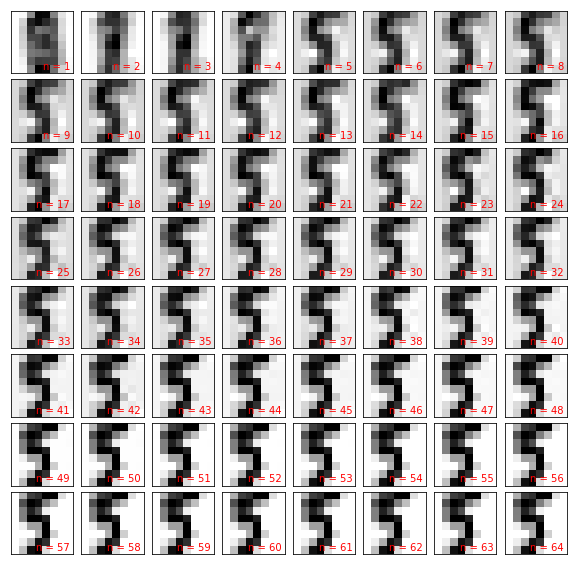

In [8]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

## Полезные ссылки
- [Формальное описание PCA](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)